**-----------------------------------------------------------------------------------------------------------------**

*In this lecture we are going to explore:*

1. What is Parts of Speech (POS) Tagging in Natural Language Processing?
2. Importance and Applications of Parts of Speech (POS) Tagging in Natural Language Processing.

**-----------------------------------------------------------------------------------------------------------------**

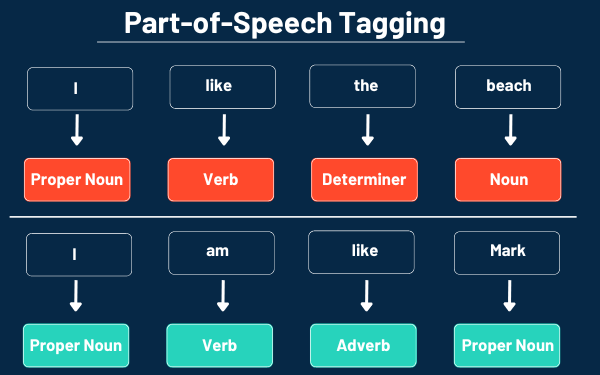

#### Part-of-Speech (POS) tagging definition:

* Part-of-Speech (POS) tagging is a fundamental task in Natural Language Processing (NLP) that involves assigning a grammatical category (such as noun, verb, adjective, etc.) to each word in a sentence.
  
* Part-of-speech tagging (POS tagging) is the task of tagging a word in a text with its part of speech. A part of speech is a category of words with similar grammatical properties. Common English parts of speech are noun, verb, adjective, adverb, pronoun, preposition, conjunction, etc.

* POS tags are short codes representing specific parts of speech. Common POS tags include:

  
1. Noun (NN)
2. Verb (VB)
3. Adjective (JJ)
4. Adverb (RB)
5. Pronoun (PRP)
6. Preposition (IN)
7. Conjunction (CC)
8. Determiner (DT)
9. Interjection (UH)



# 3.2 Parts of Speech (POS) Tagging

In [1]:
import spacy
import pandas as pd

In [2]:
nlp = spacy.load('en_core_web_sm')
# https://spacy.io/models/en
# en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments),
# that includes vocabulary, syntax and entities.
# if you are running this for the first time, or recieve an error "Can't find model 'en_core_web_sm'",
# then please run the follwing in your terminal: python -m spacy download en_core_web_sm

In [3]:
# our text is from jane austin's 'emma'
# we have removed punctuation, lowercased but left in stop words
emma_ja = "emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of authority being now long passed away they had been living together as friend and friend very mutually attached and emma doing just what she liked highly esteeming miss taylors judgment but directed chiefly by her own"
print(emma_ja)

emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of auth

In [5]:
# create a spacy doc from our text - this will generate tokens and their assosciated pos tags
spacy_doc = nlp(emma_ja)

In [7]:
print(spacy_doc)

emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of auth

In [8]:
# extract the tokens and pos tags into a dataframe
pos_df = pd.DataFrame(columns=['token', 'pos_tag'])

In [9]:
for token in spacy_doc:
    pos_df = pd.concat([pos_df,
                       pd.DataFrame.from_records([{'token': token.text, 'pos_tag': token.pos_}])], ignore_index=True)

In [10]:
pos_df.head(15)

,token,pos_tag
0,emma,PROPN
1,woodhouse,PROPN
2,handsome,ADV
3,clever,ADJ
4,and,CCONJ
5,rich,ADJ
6,with,ADP
7,a,DET
8,comfortable,ADJ
9,home,NOUN


In [11]:
# token frequency count
pos_df_counts = pos_df.groupby(['token','pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
pos_df_counts.head(10)

,token,pos_tag,counts
86,of,ADP,14
48,had,AUX,9
53,her,PRON,9
6,and,CCONJ,8
109,the,DET,8
0,a,DET,6
112,to,PART,5
12,been,AUX,4
60,in,ADP,4
118,very,ADV,4


In [12]:
# counts of pos_tags
pos_df_poscounts = pos_df_counts.groupby(['pos_tag'])['token'].count().sort_values(ascending=False)
pos_df_poscounts.head(10)

,token
pos_tag,
NOUN,33
VERB,21
ADJ,18
ADV,18
PRON,9
ADP,8
PROPN,6
DET,5
AUX,4


In [13]:
# see most common nouns
nouns = pos_df_counts[pos_df_counts.pos_tag == "NOUN"][0:10]
nouns

,token,pos_tag,counts
47,governess,NOUN,3
45,friend,NOUN,3
101,sisters,NOUN,2
27,daughters,NOUN,2
34,emma,NOUN,2
80,mother,NOUN,2
128,years,NOUN,2
92,period,NOUN,1
74,mildness,NOUN,1
77,mistress,NOUN,1


In [14]:
# see most common verbs
verbs = pos_df_counts[pos_df_counts.pos_tag == "ADJ"][0:10]
verbs

,token,pos_tag,counts
69,little,ADJ,2
78,more,ADJ,2
89,own,ADJ,1
75,miss,ADJ,1
84,nominal,ADJ,1
100,short,ADJ,1
96,rich,ADJ,1
33,early,ADJ,1
25,comfortable,ADJ,1
24,clever,ADJ,1


### Applications where POS tagging plays a crucial role:

1. Syntactic Parsing:

Application: Understanding the grammatical structure of sentences.
Role of POS Tagging: POS tags provide information about the syntactic role of each word, aiding in syntactic parsing and tree construction.

2. Named Entity Recognition (NER):

Application: Identifying and classifying entities (e.g., persons, organizations, locations) in text.
Role of POS Tagging: POS tags help in identifying proper nouns, which are often indicative of named entities.

3. Information Retrieval:

Application: Improving search and retrieval of relevant documents or information.
Role of POS Tagging: Using POS tags, one can prioritize or filter search results based on the grammatical category of words. For instance, focusing on nouns for certain queries.

4. Text Summarization:

Application: Generating concise summaries of longer texts.
Role of POS Tagging: Understanding the syntactic structure helps in identifying key elements and relationships in the text, aiding in the creation of coherent summaries.

5. Machine Translation:

Application: Translating text from one language to another.
Role of POS Tagging: POS tags provide information about the grammatical structure, aiding in accurate translation by preserving the syntactic and grammatical nuances of the source language.

6. Sentiment Analysis:

Application: Determining the sentiment expressed in a piece of text (positive, negative, neutral).
Role of POS Tagging: Identifying adjectives and verbs in particular helps in capturing the sentiment expressed by the author.

7. Question Answering Systems:

Application: Generating accurate answers to user queries.
Role of POS Tagging: Understanding the grammatical structure of questions helps in extracting key information and formulating appropriate answers.

8. Text-to-Speech Synthesis:

Application: Converting written text into spoken language.
Role of POS Tagging: POS tags guide the synthesis process, ensuring that the spoken output follows appropriate intonation and emphasis based on the grammatical structure.

9. Speech Recognition:

Application: Converting spoken language into written text.
Role of POS Tagging: POS tags contribute to language models used in speech recognition, aiding in predicting the likely sequence of words based on their grammatical roles.

10. Grammar Checking:

Application: Identifying and correcting grammatical errors in written text.
Role of POS Tagging: POS tags help in detecting errors related to word usage, agreement, and syntactic structure.